## 0scillating Gene Model

### Oscillating gene is a gene that is expressed in a rhythmic pattern or in periodic cycles.Oscillating genes are usually circadian and can be identified by periodic changes in the state of an organisms. Oscillating gene model is a complex gene network.
### Same as above, the Central Dogma of molecular Biology states that DNA makes and RNA makes proteins.The process by which DNA is copied to RNA is called transcription and by which RNA is used to produce protein is translation. 
### For this model, let us consider Gene first as ($G_{1}$), Gene second as ( $G_{2}$) and Gene third($G_{3}$). $G_{1}$ activate the $G_{2}$ and facilitates the transcription of $G_{2}$ as a result $G_{2}$ get transcribed. It is positive interaction. $G_{2}$ does same for the $G_{3}$  and facilitates the transcription of $G_{3}$ as a result $G_{3}$ get transcribed.
### But  $G_{3}$  comes back to repress the transcription of  $G_{1}$.  $G_{3}$ is inhibiting the expression by blocking the transcription of  $G_{1}$.It is known as negative feedback because it is cascading  $G_{1}$ being transcribed and then activating  $G_{2}$ which later transcribe and help in activating  $G_{3}$. But  $G_{3}$  is negatively feeding back. This cause oscillation during stimulation.
### The differential equation for 0scillating Gene Model :
$$\frac{dG_1}{dt} = \left[\frac{c^{n}}{c^{n} + G_{3}^{n}}\right]k_{1} - \gamma_{1}G_{1}$$
$$\frac{dG_2}{dt} = \left[\frac{G_{1}^{n}}{c^{n} + G_{1}^{n}}\right]k_{2} - \gamma_{2}G_{2}$$
$$\frac{dG_3}{dt} = \left[\frac{G_{2}^{n}}{c^{n} + G_{2}^{n}}\right]k_{3} - \gamma_{3}G_{3}$$
### Where
* $k_{1}$ is production rate of $G_{1}$
* $\gamma_{1}$ is degradation rate of $G_{1}$
* $k_{2}$ is production rate of $G_{2}$
* $\gamma_{2}$ is degradation rate of $G_{2}$
* $k_{3}$ is production rate of $G_{3}$
* $\gamma_{3}$ is degradation rate of $G_{3}$
* c = constant
* n =  hill constant 

In [36]:
# We need some modules (Python libraries) in the following.
# Usually, such modules are loaded in the first cell of a notebook.
# The modules that we need concern numerical calculations,
# solving the ordinary differential equations, and plotting them later.

# all plots should appear directly within the notebook
%matplotlib inline
# modules necessary for plotting
import matplotlib.pyplot as plt

# integrate a system of ordinary differential equations
# initial value problem
from scipy.integrate import odeint

# module to make available data structures and routines
# for numerics
import numpy as np

In [37]:
y0 = [0,0,0] # 0 for G1, 0 for G2 and 0 for G3
t = np.linspace(0,200,num=100) # 100 means hundred different point


In [38]:
k_1 = 0.5
gamma_1 = 0.1 #degradtion rate should be less than production rate
k_2 = 0.5
gamma_2 = 0.1
k_3 = 0.5
gamma_3 = 0.1
n = 9
c = 1

In [39]:
params = [k_1, gamma_1, k_2, gamma_2, k_3, gamma_3, n, c] #putting the params to array which will be passed in this offer

In [40]:
def sim(variables, t, params):
    G1 = variables[0]
    G2 = variables[1]
    G3 = variables[2]
    k_1 = params[0]
    gamma_1 = params[1]
    k_2 = params[2]
    gamma_2 = params[3]
    k_3 = params[4]
    gamma_3 = params[5]
    n = params[6]
    c = params[7]
    dG1dt = (c**n / (c**n + G3**n)) * k_1 - gamma_1 * G1
    dG2dt = (G1**n / (c**n + G1**n)) * k_2 - gamma_2 * G2
    dG3dt = (G2**n / (c**n + G2**n)) * k_3 - gamma_3 * G3
    return([dG1dt,dG2dt,dG3dt])
        

In [41]:
y = odeint(sim, y0, t, args=(params,))#, is used for storing args
y = odeint(sim,y0,t, args=(params,))

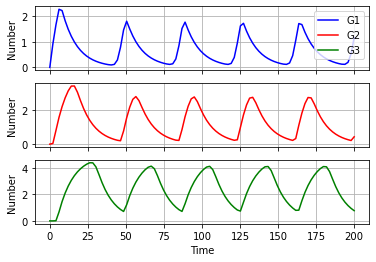

In [43]:
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=False)
line1, = ax1.plot(t , y[:,0], color="b",label="G1")
line2, = ax2.plot(t , y[:,1], color="r",label="G2")
line3, = ax3.plot(t , y[:,2], color="g",label="G3")
ax1.set_ylabel("Number")
ax2.set_ylabel("Number")
ax3.set_ylabel("Number")
#ax1.set_xlabel("Time")
#ax2.set_xlabel("Time")
ax3.set_xlabel("Time")
ax1.legend(handles=[line1,line2,line3])
ax1.grid()
ax2.grid()
ax3.grid()
#plt.show()
plt.savefig("Oscillating_Gene_Network_1.pdf", dpi=400,  bbox_inches='tight')


## Observation

### The above figure shows the relation between Gene first ($G_{1}$) , Gene second($G_{2}$) and Gene third($G_{3}$)  over time. Along the x-axis, we have the time axis and along y-axis we have number of Gene first ($G_{1}$), Gene second$G_{2}$ and Gene 3($G_{3}$).  We observe that $G_{1}$(blue line) denotes Gene first, $G_{2}$(red line) denotes Gene second and $G_{3}$(green line) denotes Gene third. In this figure we find oscillation with 3G network.Gene third $G_{3}$ is repressing $G_{1}$ which is negative feedback. Here $G_{1}$ is being produced that leads to $G_{2}$ production and $G_{2}$ is produced which leads to production of $G_{3}$. But $G_{3}$ produced stops $G_{1}$ from being produced. So that we get waves like this.      

## Changing the initial parameters

In [44]:
k_1 = 0.8
gamma_1 = 0.1 #degradtion rate should be less than production rate
k_2 = 0.7
gamma_2 = 0.2
k_3 = 0.8
gamma_3 = 0.2
n = 6
c = 2

In [45]:
params = [k_1, gamma_1, k_2, gamma_2, k_3, gamma_3, n, c] #putting the params to array which will be passed in this offer

In [46]:
def sim(variables, t, params):
    G1 = variables[0]
    G2 = variables[1]
    G3 = variables[2]
    k_1 = params[0]
    gamma_1 = params[1]
    k_2 = params[2]
    gamma_2 = params[3]
    k_3 = params[4]
    gamma_3 = params[5]
    n = params[6]
    c = params[7]
    dG1dt = (c**n / (c**n + G3**n)) * k_1 - gamma_1 * G1
    dG2dt = (G1**n / (c**n + G1**n)) * k_2 - gamma_2 * G2
    dG3dt = (G2**n / (c**n + G2**n)) * k_3 - gamma_3 * G3
    return([dG1dt,dG2dt,dG3dt])
        

In [47]:
y = odeint(sim, y0, t, args=(params,))#, is used for storing args
y = odeint(sim,y0,t, args=(params,))

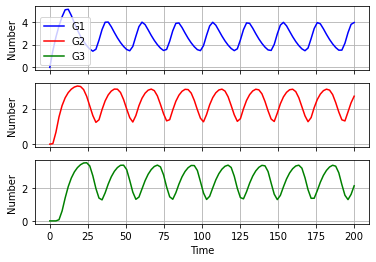

In [48]:
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=False)
line1, = ax1.plot(t , y[:,0], color="b",label="G1")
line2, = ax2.plot(t , y[:,1], color="r",label="G2")
line3, = ax3.plot(t , y[:,2], color="g",label="G3")
ax1.set_ylabel("Number")
ax2.set_ylabel("Number")
ax3.set_ylabel("Number")
#ax1.set_xlabel("Time")
#ax2.set_xlabel("Time")
ax3.set_xlabel("Time")
ax1.legend(handles=[line1,line2,line3])
ax1.grid()
ax2.grid()
ax3.grid()
#plt.show()
plt.savefig("Oscillating_Gene_Network_2.pdf", dpi=400,  bbox_inches='tight')


### If we change the initial parameters of $k_1$, $\gamma_1$, $k_{2}$, $\gamma_{2}$, $k_3$ and $\gamma_3$ greater than above we came to know that the nature of oscillation of all Gene remain same but peak points of the all Gene varies from first figure.
